🟩Import Libraries


In [1]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# 📄 Dataset Overview: IoT-Enabled Smart Grid for ESG Assessment

This dataset is designed to support **AI/ML-based ESG ratings** using IoT-generated energy data from smart grids. It includes **real-time and historical environmental and operational variables**, making it ideal for transition finance use cases where financial statements are not available.

The primary goal is to assess **energy efficiency and sustainability** of infrastructure operations using **proxy variables** — enabling data-driven ESG scoring aligned with net-zero goals.

---

## 🔧 Key Dataset Features

| **Variable Name**                 | **Description**                                                                 |
|----------------------------------|---------------------------------------------------------------------------------|
| `Timestamp`                      | Date and time of the observation (hourly resolution)                           |
| `Power_Consumption_kWh`         | Total power consumed during the hour                                           |
| `Voltage_V`, `Current_A`         | Electrical parameters to assess power behavior                                 |
| `Power_Factor`                  | Ratio of usable to apparent power (efficiency indicator)                       |
| `Grid_Frequency_Hz`             | Grid stability and reliability marker                                          |
| `Reactive_Power_kVAR`           | Energy that does not perform useful work                                       |
| `Active_Power_kW`               | Actual power used for performing work                                          |
| `Solar_Power_Generation_kW`     | Amount of power generated from solar sources                                  |
| `Wind_Power_Generation_kW`      | Power generated from wind sources                                              |
| `Energy_Source_Type`            | Type of energy source (grid, solar, hybrid, etc.)                              |
| `Temperature_C`, `Humidity_%`   | Environmental context data captured from IoT sensors                          |
| `Demand_Response_Event`         | Indicator of load-shifting or energy-saving events (binary flag)               |
| `Previous_Day_Consumption_kWh`  | Historical power usage reference                                               |
| `Peak_Load_Hour`                | Binary flag for high-demand periods                                            |
| `User_Type`                     | Classification of the user (residential, industrial, commercial, etc.)         |
| `Normalized_Consumption`        | Power consumption scaled for operational comparability                         |
| `Energy_Efficiency_Score`       | **Target variable**: ESG-aligned score ranging from 0 (low) to 100 (high)      |

---

This dataset allows us to simulate **dynamic ESG scoring** and evaluate sustainability practices using only real-time, observable data — making it ideal for transition finance modeling using AI and IoT.


📁 Load the Dataset



In [2]:
# Step 2: Load the dataset from your local path
df = pd.read_csv("iiot_smart_grid_dataset.csv")

# Check structure
print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (8737, 20)
             Timestamp  Power_Consumption_kWh   Voltage_V  Current_A  \
0  2023-01-01 00:00:00               2.185431  213.199299   7.508245   
1  2023-01-01 01:00:00               4.778214  213.593030   1.415176   
2  2023-01-01 02:00:00               3.793973  233.630149   7.840398   
3  2023-01-01 03:00:00               3.193963  233.974542  17.900310   
4  2023-01-01 04:00:00               1.202084  226.750360  14.117473   

   Power_Factor  Grid_Frequency_Hz  Reactive_Power_kVAR  Active_Power_kW  \
0      0.889422          50.233661             4.116021         1.656607   
1      0.864647          50.118395             3.028259         3.462097   
2      0.802709          49.585861             0.927931         1.043200   
3      0.959421          49.807698             0.957197         3.113750   
4      0.865588          49.973048             2.512873         0.738547   

   Demand_Response_Event  Temperature_C  Humidity_% Weather_Condition  \
0          

🧹 Preprocess the Data


In [3]:
# Step 3: Drop unnecessary columns
df = df.drop(columns=["Timestamp", "Weather_Condition"])


🎯 Define Features and Target



In [4]:
# Step 4: Set up features and target
X = df.drop(columns=["Energy_Efficiency_Score"])
y = df["Energy_Efficiency_Score"]


🧪 Train-Test Split



In [5]:
# Step 5: Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


🤖 Train Random Forest Model



In [6]:
# Step 6: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

🧠 Make Predictions & Evaluate



In [7]:
# Step 7: Predict and evaluate
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 1.75
R² Score: 0.99


/Users/thomasmann/opt/anaconda3/envs/ie/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


📊 Plot Feature Importance



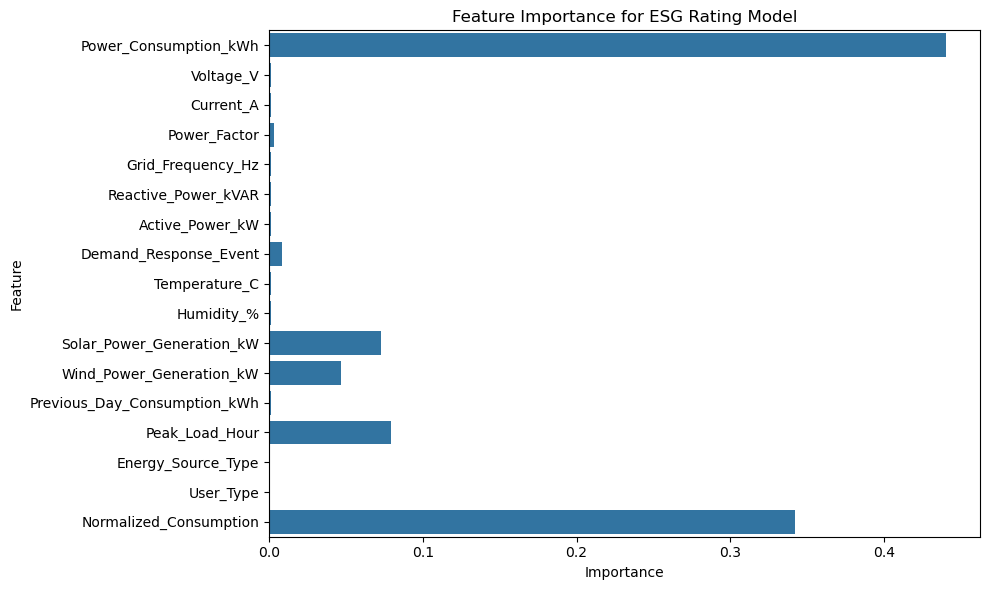

In [8]:
# Step 8: Visualize feature importance
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance for ESG Rating Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## 🔍 Key Insights from Feature Importance

Our ESG Rating model, built using Random Forest, revealed the following insights based on IoT energy data:

### 🔝 Top Predictors of Energy Efficiency

1. **Power_Consumption_kWh**  
   - The strongest predictor of ESG performance.  
   - Lower and optimized power consumption indicates more sustainable operations.

2. **Normalized_Consumption**  
   - Adjusts for project scale, offering a fair comparison between different sizes.  
   - Highlights how efficiently energy is used per unit baseline.

3. **Peak_Load_Hour**  
   - Measures how well a project manages energy during high-demand periods.  
   - High peak loads may indicate inefficiencies or stress on the grid.

4. **Solar_Power_Generation_kW**  
   - A clear proxy for renewable integration.  
   - Projects with higher solar generation contribute positively to ESG outcomes.

### 📉 Low-Impact Variables (in this dataset)

- `Voltage_V`, `Current_A`, `Grid_Frequency_Hz`: Likely redundant or stable across samples.
- `Temperature_C`, `Humidity_%`: May influence energy usage indirectly but have little standalone predictive power in this context.

---

These insights validate our approach of using **proxy IoT metrics** (instead of traditional financials) to create **transparent, real-time ESG scores** for transition finance monitoring.


### 🔍 Proxy Variables for ESG Scoring

To replace traditional financial metrics, we leveraged real-time, sensor-driven data as proxy indicators of environmental sustainability. These included:

- **Power consumption and normalization** to assess energy efficiency
- **Solar and wind generation** as direct indicators of renewable integration
- **Peak loads and demand response events** to evaluate grid-conscious behavior
- **Energy source type and power factor** to infer clean vs. dirty energy usage

These proxies allowed us to build a robust, explainable ESG Ratings model without relying on P&L, balance sheets, or self-reported ESG disclosures.


## 🧮 ESG Risk Classification

Now that we've successfully predicted Energy Efficiency Scores using our ML model, we translate these continuous values into **actionable ESG risk levels**.

This classification allows stakeholders (e.g., investors, regulators) to quickly assess the sustainability performance of each project based on its predicted environmental score.

### 🟢 Classification Criteria

We define risk levels as:

- **Low Risk (Green)** → Score > 70  
  Indicates high energy efficiency and sustainable practices.

- **Moderate Risk (Orange)** → Score between 40 and 70  
  Acceptable performance but potential for improvement.

- **High Risk (Red)** → Score < 40  
  Signals inefficient energy use or lack of renewable integration.

### 🧠 Why This Matters

- Converts technical predictions into **clear ESG labels**
- Helps prioritize attention and action
- Enhances explainability for non-technical stakeholders

We’ll now apply this classification to our test set and generate a results table for further analysis.


In [9]:
# Define classification function
def classify_risk(score):
    if score < 40:
        return "High Risk"
    elif score <= 70:
        return "Moderate Risk"
    else:
        return "Low Risk"

# Apply to predicted scores
results_df = X_test.copy()
results_df["Actual_Score"] = y_test
results_df["Predicted_Score"] = y_pred
results_df["ESG_Risk_Level"] = results_df["Predicted_Score"].apply(classify_risk)

# Show preview
results_df.head(10)


,Power_Consumption_kWh,Voltage_V,Current_A,Power_Factor,Grid_Frequency_Hz,Reactive_Power_kVAR,Active_Power_kW,Demand_Response_Event,Temperature_C,Humidity_%,Solar_Power_Generation_kW,Wind_Power_Generation_kW,Previous_Day_Consumption_kWh,Peak_Load_Hour,Energy_Source_Type,User_Type,Normalized_Consumption,Actual_Score,Predicted_Score,ESG_Risk_Level
1142,3.551073,232.192270,10.395794,0.946879,50.189943,3.171226,0.982882,0,36.456087,58.098147,0.318256,0.041470,3.986570,0,3,1,0.678204,36.826020,37.384620,High Risk
1417,1.049495,241.823273,9.803193,0.801853,50.396678,0.437385,3.193051,0,0.959023,87.316758,1.450222,1.250794,2.921596,0,3,1,0.122134,73.435442,74.724989,Low Risk
5214,2.271898,240.135525,4.037504,0.844364,49.968257,1.983950,2.020239,1,8.762945,71.119014,0.791461,2.389503,2.940231,0,1,1,0.393859,58.099135,59.880543,Moderate Risk
1287,2.077821,239.443286,5.595523,0.996270,50.257051,2.079200,2.206827,0,17.766635,31.938625,2.287898,0.288213,2.633038,0,3,1,0.350718,65.270032,63.687804,Moderate Risk
1701,2.446240,228.237847,8.053464,0.915169,49.528206,4.221909,4.482148,0,21.677313,43.559634,2.913731,1.185463,2.916197,1,1,2,0.432613,57.168683,55.813498,Moderate Risk
4091,2.035934,225.019890,12.731291,0.844062,50.268399,2.961418,1.096137,0,15.085991,43.033998,2.452655,1.713555,4.725314,1,3,0,0.341407,60.641925,59.496684,Moderate Risk
1233,0.640103,212.665120,16.516896,0.920273,49.953339,4.583085,2.997476,0,1.190167,62.299751,0.271014,2.094462,4.185730,0,3,0,0.031132,78.676265,78.688144,Low Risk
2453,2.062747,234.304943,5.979784,0.900755,49.570823,1.719031,2.759418,0,-3.715808,38.920253,2.469918,1.445964,1.195615,1,2,2,0.347368,60.226134,59.285845,Moderate Risk
7562,1.010242,236.245482,5.078971,0.853313,49.815420,3.885671,3.033616,0,24.906240,82.953332,2.908329,2.117411,3.647808,1,1,1,0.113409,76.524522,74.201001,Low Risk
7644,1.241230,233.994719,10.575214,0.823581,50.355427,1.621143,1.837849,1,4.068961,70.365818,0.893228,1.748291,2.356602,0,0,2,0.164755,66.441485,68.691060,Moderate Risk


## 📊 Visualizing ESG Risk Outcomes

To make our ESG rating model more interpretable and visually impactful, we’ve created two charts:

1. **ESG Risk Level Distribution:**  
   Shows how many projects fall into each ESG risk tier (High, Moderate, Low) based on predicted scores.

2. **Actual vs. Predicted Scores:**  
   Plots the model’s prediction accuracy and visually highlights each project's risk classification using color coding.

These visuals are useful for both technical validation and business communication.


/var/folders/lq/jpd_qvx511vgwlfbww5t8nr40000gn/T/ipykernel_20728/3741464825.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_counts.index, y=risk_counts.values, palette=["#e74c3c", "#f39c12", "#2ecc71"])


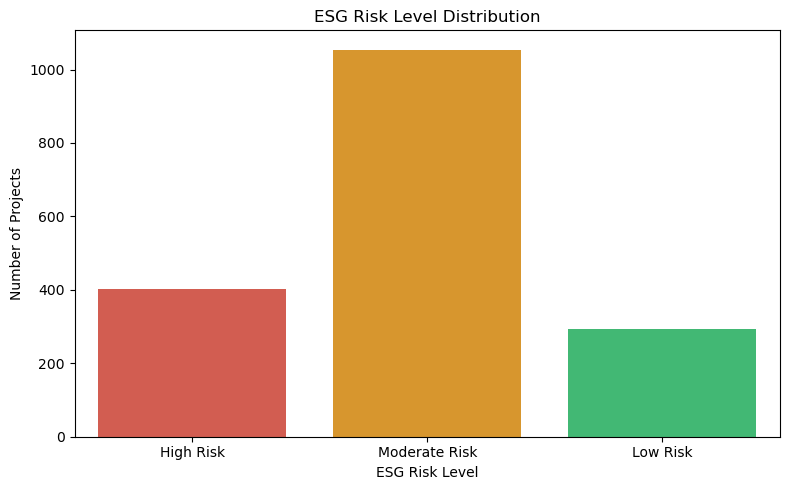

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count ESG risk levels
risk_counts = results_df["ESG_Risk_Level"].value_counts().reindex(["High Risk", "Moderate Risk", "Low Risk"])

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=risk_counts.index, y=risk_counts.values, palette=["#e74c3c", "#f39c12", "#2ecc71"])
plt.title("ESG Risk Level Distribution")
plt.xlabel("ESG Risk Level")
plt.ylabel("Number of Projects")
plt.tight_layout()
plt.show()


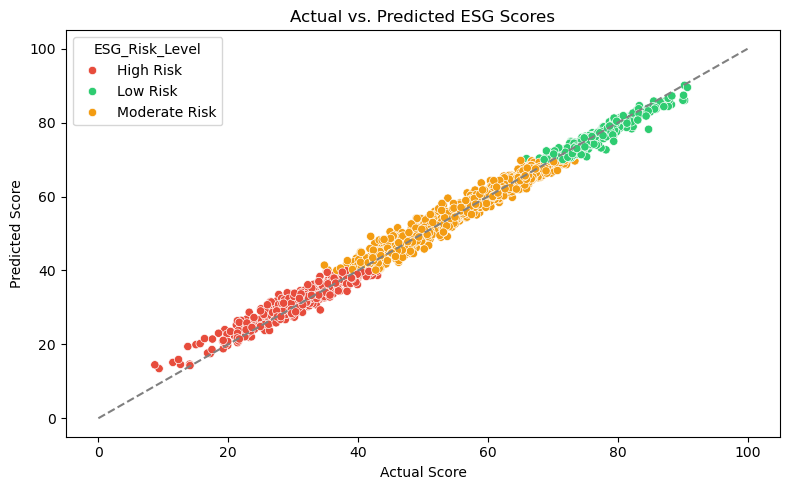

In [11]:
# Scatter plot to visualize prediction performance
plt.figure(figsize=(8, 5))
sns.scatterplot(x=results_df["Actual_Score"], y=results_df["Predicted_Score"], hue=results_df["ESG_Risk_Level"],
                palette={"High Risk": "#e74c3c", "Moderate Risk": "#f39c12", "Low Risk": "#2ecc71"})

plt.plot([0, 100], [0, 100], '--', color='gray')  # reference line
plt.title("Actual vs. Predicted ESG Scores")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.tight_layout()
plt.show()


## 📊 ESG Risk Distribution Insights

- The majority of projects fall into the **Moderate Risk** category, indicating stable but improvable energy efficiency.
- Around **400 projects are High Risk**, signaling a need for immediate action or deeper investigation.
- Only **a minority of projects qualify as Low Risk**, showing that even in optimized systems, there's room to expand renewable integration and demand response strategies.

## 📈 Model Accuracy Insights (Actual vs. Predicted)

- The model demonstrates **very strong predictive performance**, with most points closely aligned along the diagonal.
- ESG risk tiers are visually well-separated, confirming that the ML model not only predicts efficiently but does so in a way that aligns with business logic.
- This gives stakeholders confidence that the scoring system is both **data-driven and explainable**.


In [16]:
pip install pandas matplotlib seaborn


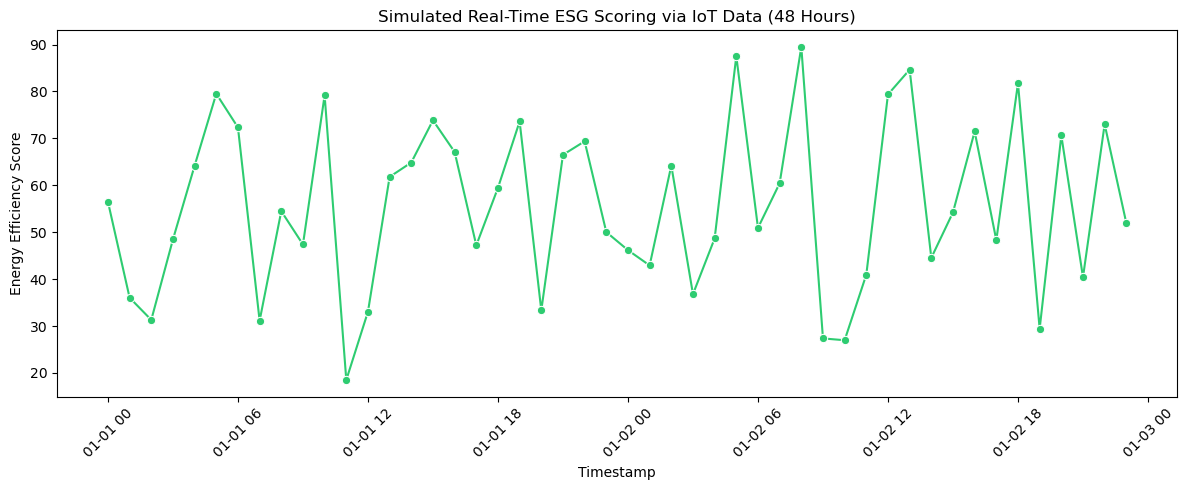

In [12]:
# 📌 Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Step 2: Load your CSV file
file_path = r"iiot_smart_grid_dataset.csv"
df = pd.read_csv(file_path)

# 📌 Step 3: Convert timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# 📌 Step 4: Select first 48 hours of ESG scoring data
subset = df.sort_values("Timestamp").head(48)

# 📌 Step 5: Plot the Energy Efficiency Score over time
plt.figure(figsize=(12, 5))
sns.lineplot(x=subset["Timestamp"], y=subset["Energy_Efficiency_Score"], marker="o", color="#2ecc71")

plt.title("Simulated Real-Time ESG Scoring via IoT Data (48 Hours)")
plt.xlabel("Timestamp")
plt.ylabel("Energy Efficiency Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🔄 Insight from Real-Time ESG Monitoring Chart

- The ESG score fluctuates significantly over 48 hours, highlighting how energy efficiency is affected by operational and environmental changes.
- These changes reflect real-time system behavior — making IoT-based ESG tracking a dynamic, transparent alternative to static reporting.
- Our platform’s AI model allows for hourly ESG scoring, enabling stakeholders to flag underperforming assets instantly and take corrective action.
